## Loading Libraries:

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Reading CSV files

In [69]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#### Info of the dataset

In [70]:
print("INFO of Train dataset: \n",train.info())
print("------"*15)
print("INFO of Test dataset: \n",test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
INFO of Train dataset: 
 None
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 2

### Checking for Null values

In [71]:
print(train.isnull().sum())
print("---"*30)
print(test.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
------------------------------------------------------------------------------------------
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


we have null values in education and previous year rating

In [72]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [73]:
for i in train.columns:
    print('{}:'.format(i))
    print(train[i].value_counts(dropna=False))

employee_id:
2047     1
19228    1
4887     1
6934     1
789      1
15122    1
11024    1
56078    1
49933    1
51980    1
58121    1
60168    1
39686    1
33541    1
35588    1
47874    1
43776    1
70391    1
66293    1
74481    1
19164    1
31450    1
27352    1
4823     1
6870     1
25369    1
17181    1
2772     1
21279    1
17245    1
        ..
48573    1
36283    1
40377    1
62964    1
65013    1
60919    1
30244    1
63028    1
52787    1
11823    1
15917    1
13868    1
1578     1
7721     1
28199    1
26150    1
32293    1
20003    1
38392    1
17954    1
24097    1
22048    1
77327    1
69131    1
67082    1
71176    1
44543    1
48637    1
36347    1
4098     1
Name: employee_id, Length: 54808, dtype: int64
department:
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: departme

In [74]:
print("Shape of train: ",train.shape)
print("Shape of test: ",test.shape)

Shape of train:  (54808, 14)
Shape of test:  (23490, 13)


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [76]:
cat=train.select_dtypes('object')

In [77]:
gender=train['gender']
education=train['education']
sep=pd.DataFrame({'gender':gender,'education':education})

## Creating a class column in both train and test to impute the missing values

In [79]:
train['class']='train'
test['is_promoted']=np.nan
test['class']='test'


In [80]:
tot=pd.concat([train,test])

In [81]:
tot.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,class
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [82]:
tot.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
class                       0
dtype: int64

In [83]:
tot['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [84]:
tot['education'].fillna('Bachelor\'s',inplace=True)

In [85]:
tot['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [86]:
tot['previous_year_rating'].fillna(tot['previous_year_rating'].median(),inplace=True)

In [87]:
tot.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,class
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0.0,train
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0.0,train
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0.0,train
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0.0,train
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0.0,train


In [88]:
tot.shape

(78298, 15)

In [89]:
data=pd.get_dummies(tot,columns=['department','education','gender','recruitment_channel'],drop_first=True)

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [91]:
data.columns

Index(['employee_id', 'region', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'class',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [92]:
data['region']=le.fit_transform(data['region'])

In [94]:
data.head(10)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,31,1,35,5.0,8,1,0,49,0.0,...,0,0,0,1,0,0,1,0,0,1
1,65141,14,1,30,5.0,4,0,0,60,0.0,...,1,0,0,0,0,0,0,1,0,0
2,7513,10,1,34,3.0,7,0,0,50,0.0,...,0,0,0,1,0,0,0,1,0,1
3,2542,15,2,39,1.0,10,0,0,50,0.0,...,0,0,0,1,0,0,0,1,0,0
4,48945,18,1,45,3.0,2,0,0,73,0.0,...,0,0,0,0,1,0,0,1,0,0
5,58896,11,2,31,3.0,7,0,0,85,0.0,...,0,0,0,0,0,0,0,1,0,1
6,20379,12,1,31,3.0,5,0,0,59,0.0,...,1,0,0,0,0,0,0,0,0,0
7,16290,27,1,33,3.0,6,0,0,63,0.0,...,1,0,0,0,0,0,1,1,0,1
8,73202,12,1,28,4.0,5,0,0,83,0.0,...,0,0,0,0,0,0,0,1,0,0
9,28911,0,1,32,5.0,5,1,0,54,0.0,...,0,0,0,1,0,0,1,1,0,1


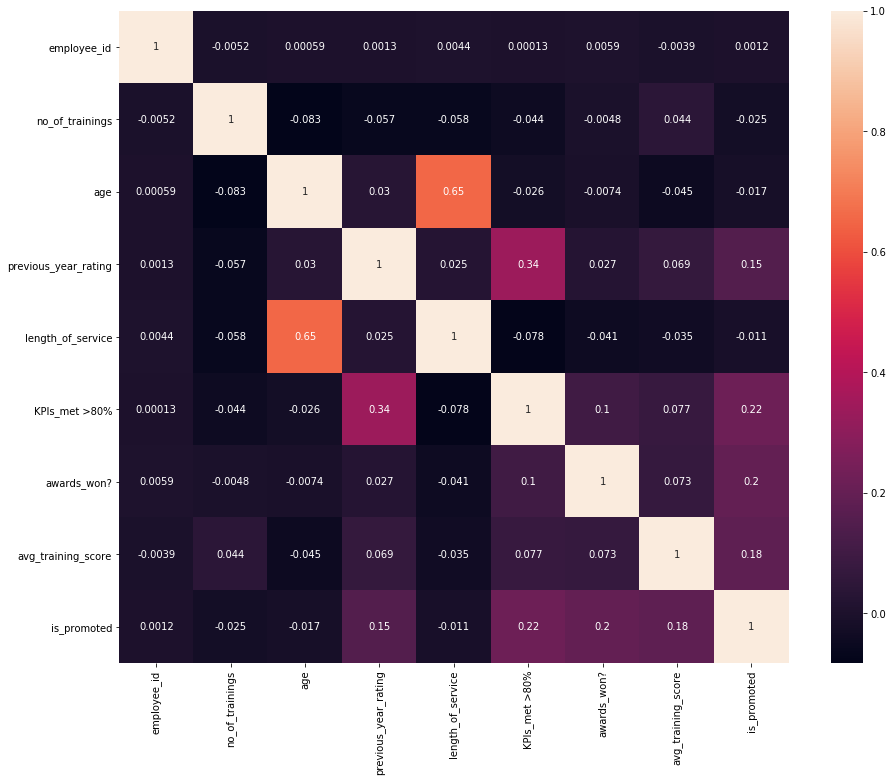

In [96]:
plt.figure(figsize=(15,12))
sns.heatmap(tot.corr(),annot=True)
plt.show()

In [107]:
train=data[data['class']=='train']

In [108]:
test=data[data['class']=='test']

In [109]:
train.shape

(54808, 24)

In [110]:
test.shape

(23490, 24)

In [111]:
del train['class']
del test['class']

In [112]:
X=train.drop('is_promoted',axis=1)
y=train['is_promoted']

In [113]:
X.head()

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,31,1,35,5.0,8,1,0,49,0,...,0,0,0,1,0,0,1,0,0,1
1,65141,14,1,30,5.0,4,0,0,60,0,...,1,0,0,0,0,0,0,1,0,0
2,7513,10,1,34,3.0,7,0,0,50,0,...,0,0,0,1,0,0,0,1,0,1
3,2542,15,2,39,1.0,10,0,0,50,0,...,0,0,0,1,0,0,0,1,0,0
4,48945,18,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0


## Logistic Regression:

In [122]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [123]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [124]:
lg.fit(Xtrain,ytrain)

C:\Users\Raviteja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [125]:
from sklearn.metrics import f1_score,confusion_matrix,roc_curve,accuracy_score

In [126]:
ypred=lg.predict(Xtest)

In [127]:
f1=f1_score(ypred,ytest)
acc_score=accuracy_score(ypred,ytest)
print("score: ",f1)
print("accuracy_score: ",acc_score)

score:  0.0
accuracy_score:  0.9139755519065864


C:\Users\Raviteja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [128]:
confusionmatrix=confusion_matrix(ytest,ypred)
confusionmatrix

array([[10019,     0],
       [  943,     0]], dtype=int64)

In [129]:
#fit the whole data

In [131]:
X_wtest=test.drop('is_promoted',axis=1)

In [137]:
lg.fit(X,y)
y_wpred=lg.predict(X_wtest)

C:\Users\Raviteja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
test.columns

Index(['employee_id', 'region', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [139]:
best1=pd.DataFrame({'employee_id':X_wtest['employee_id'],'is_promoted':y_wpred})

In [141]:
best1['is_promoted']=best1['is_promoted'].astype('int')

In [145]:
best1.to_csv('submission1.csv',index=False)

#### without employee_id

In [118]:
X_nid=train.drop(["employee_id",'is_promoted'],axis=1)

In [146]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X_nid,y,test_size=0.2,random_state=1)

In [147]:
lg.fit(Xtrain,ytrain)
ypred=lg.predict(Xtest)

C:\Users\Raviteja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [148]:
confusionmatrix=confusion_matrix(ytest,ypred)
confusionmatrix

array([[9997,   22],
       [ 749,  194]], dtype=int64)

### considering whole dataset

In [150]:
lg.fit(X_nid,y)

C:\Users\Raviteja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
X_wtest=test.drop(['is_promoted','employee_id'],axis=1)

In [153]:
y_nidpred=lg.predict(X_wtest)

In [154]:
best1['is_promoted']=y_nidpred

In [157]:
best1['is_promoted']=best1['is_promoted'].astype('int')

In [158]:
best1.to_csv('submission2.csv',index=False)

## Decison Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [165]:
param_dist = {'n_estimators':[1,2,3,5,9,11],'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}


In [166]:
from sklearn.model_selection import GridSearchCV
fit_rf = RandomForestClassifier(random_state=42)


In [167]:
cv_rf = GridSearchCV(fit_rf, cv = 5,param_grid=param_dist, n_jobs = 3)


In [169]:
cv_rf.fit(X_nid,y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [1, 2, 3, 5, 9, 11], 'max_depth': [2, 3, 4], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt', 'log2', None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [170]:

y_rfpred=cv_rf.predict(X_wtest)

In [171]:
best1['is_promoted']=y_rfpred
best1['is_promoted']=best1['is_promoted'].astype('int')
best1.to_csv('submission3.csv',index=False)

In [174]:
param_dist = {'max_depth': [2, 3, 4],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}
fit_dt=DecisionTreeClassifier(random_state=42)
cv_dt = GridSearchCV(fit_dt, cv = 5,param_grid=param_dist, n_jobs = 3)


cv_dt.fit(X_nid,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'max_depth': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2', None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
y_dtpred=cv_dt.predict(X_wtest)
best1['is_promoted']=y_dtpred
best1['is_promoted']=best1['is_promoted'].astype('int')
best1.to_csv('submission4.csv',index=False)

## XGBoost 

In [176]:
from xgboost import XGBClassifier

In [ ]:
param_test2b = {
  'min_child_weight':[5,6],
  'max_depth': range(3,10,2),
  'n_estimators':[20,30,50],
  'scale_pos_weight':[1,2,3,4],
  'colsample_bytree':[0.7,0.8], 
  'subsample':[0.7,0.8],
  'gamma':[0,0.2,0.4]   
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27), 
 param_grid = param_test2b, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_nid,y)

In [ ]:
y_xg = gsearch2b.predict(X_test)
best1['is_promoted']=y_dtpred
best1['is_promoted']=best1['is_promoted'].astype('int')
best1.to_csv('submission5.csv',index=False)